# Run model module locally

In [ ]:
import os

# Import os environment variables for file hyperparameters.
os.environ["TRAIN_FILE_PATTERN"] = "gs://machine-learning-1234-bucket/gan/data/cifar10_car/train*.tfrecord"
os.environ["EVAL_FILE_PATTERN"] = "gs://machine-learning-1234-bucket/gan/data/cifar10_car/test*.tfrecord"
os.environ["OUTPUT_DIR"] = "gs://machine-learning-1234-bucket/gan/dcgan/trained_model2"

# Import os environment variables for train hyperparameters.
os.environ["TRAIN_BATCH_SIZE"] = str(16)
os.environ["TRAIN_STEPS"] = str(200)
os.environ["SAVE_SUMMARY_STEPS"] = str(100)
os.environ["SAVE_CHECKPOINTS_STEPS"] = str(1000)
os.environ["KEEP_CHECKPOINT_MAX"] = str(10)

# Import os environment variables for eval hyperparameters.
os.environ["EVAL_BATCH_SIZE"] = str(32)
os.environ["EVAL_STEPS"] = str(100)
os.environ["START_DELAY_SECS"] = str(60)
os.environ["THROTTLE_SECS"] = str(120)

# Import os environment variables for image hyperparameters.
os.environ["HEIGHT"] = str(32)
os.environ["WIDTH"] = str(32)
os.environ["DEPTH"] = str(3)

# Import os environment variables for generator hyperparameters.
os.environ["LATENT_SIZE"] = str(512)
os.environ["GENERATOR_PROJECTION_DIMS"] = "4,4,256"
os.environ["GENERATOR_NUM_FILTERS"] = "128,128,128"
os.environ["GENERATOR_KERNEL_SIZES"] = "4,4,4"
os.environ["GENERATOR_STRIDES"] = "2,2,2"
os.environ["GENERATOR_FINAL_NUM_FILTERS"] = str(3)
os.environ["GENERATOR_FINAL_KERNEL_SIZE"] = str(3)
os.environ["GENERATOR_FINAL_STRIDE"] = str(1)
os.environ["GENERATOR_LEAKY_RELU_ALPHA"] = str(0.2)
os.environ["GENERATOR_FINAL_ACTIVATION"] = "tanh"
os.environ["GENERATOR_L1_REGULARIZATION_SCALE"] = str(0.)
os.environ["GENERATOR_L2_REGULARIZATION_SCALE"] = str(0.)
os.environ["GENERATOR_OPTIMIZER"] = "Adam"
os.environ["GENERATOR_LEARNING_RATE"] = str(0.0002)
os.environ["GENERATOR_ADAM_BETA1"] = str(0.5)
os.environ["GENERATOR_ADAM_BETA2"] = str(0.999)
os.environ["GENERATOR_ADAM_EPSILON"] = str(1e-8)
os.environ["GENERATOR_CLIP_GRADIENTS"] = "None"
os.environ["GENERATOR_TRAIN_STEPS"] = str(1)

# Import os environment variables for discriminator hyperparameters.
os.environ["DISCRIMINATOR_NUM_FILTERS"] = "64,128,128,256"
os.environ["DISCRIMINATOR_KERNEL_SIZES"] = "3,3,3,3"
os.environ["DISCRIMINATOR_STRIDES"] = "1,2,2,2"
os.environ["DISCRIMINATOR_DROPOUT_RATES"] = "0.3,0.3,0.3,0.3"
os.environ["DISCRIMINATOR_LEAKY_RELU_ALPHA"] = str(0.2)
os.environ["DISCRIMINATOR_L1_REGULARIZATION_SCALE"] = str(0.)
os.environ["DISCRIMINATOR_L2_REGULARIZATION_SCALE"] = str(0.)
os.environ["DISCRIMINATOR_OPTIMIZER"] = "Adam"
os.environ["DISCRIMINATOR_LEARNING_RATE"] = str(0.0002)
os.environ["DISCRIMINATOR_ADAM_BETA1"] = str(0.5)
os.environ["DISCRIMINATOR_ADAM_BETA2"] = str(0.999)
os.environ["DISCRIMINATOR_ADAM_EPSILON"] = str(1e-8)
os.environ["DISCRIMINATOR_CLIP_GRADIENTS"] = "None"
os.environ["DISCRIMINATOR_TRAIN_STEPS"] = str(1)
os.environ["LABEL_SMOOTHING"] = str(0.9)


## Train DCGAN model

In [7]:
%%bash
gsutil -m rm -rf ${OUTPUT_DIR}
export PYTHONPATH=$PYTHONPATH:$PWD/dcgan_module
python3 -m trainer.task \
    --train_file_pattern=${TRAIN_FILE_PATTERN} \
    --eval_file_pattern=${EVAL_FILE_PATTERN} \
    --output_dir=${OUTPUT_DIR} \
    --job-dir=./tmp \
    \
    --train_batch_size=${TRAIN_BATCH_SIZE} \
    --train_steps=${TRAIN_STEPS} \
    --save_summary_steps=${SAVE_SUMMARY_STEPS} \
    --save_checkpoints_steps=${SAVE_CHECKPOINTS_STEPS} \
    --keep_checkpoint_max=${KEEP_CHECKPOINT_MAX} \
    \
    --eval_batch_size=${EVAL_BATCH_SIZE} \
    --eval_steps=${EVAL_STEPS} \
    --start_delay_secs=${START_DELAY_SECS} \
    --throttle_secs=${THROTTLE_SECS} \
    \
    --height=${HEIGHT} \
    --width=${WIDTH} \
    --depth=${DEPTH} \
    \
    --latent_size=${LATENT_SIZE} \
    --generator_projection_dims=${GENERATOR_PROJECTION_DIMS} \
    --generator_num_filters=${GENERATOR_NUM_FILTERS} \
    --generator_kernel_sizes=${GENERATOR_KERNEL_SIZES} \
    --generator_strides=${GENERATOR_STRIDES} \
    --generator_final_num_filters=${GENERATOR_FINAL_NUM_FILTERS} \
    --generator_final_kernel_size=${GENERATOR_FINAL_KERNEL_SIZE} \
    --generator_final_stride=${GENERATOR_FINAL_STRIDE} \
    --generator_leaky_relu_alpha=${GENERATOR_LEAKY_RELU_ALPHA} \
    --generator_final_activation=${GENERATOR_FINAL_ACTIVATION} \
    --generator_l1_regularization_scale=${GENERATOR_L1_REGULARIZATION_SCALE} \
    --generator_l2_regularization_scale=${GENERATOR_L2_REGULARIZATION_SCALE} \
    --generator_optimizer=${GENERATOR_OPTIMIZER} \
    --generator_learning_rate=${GENERATOR_LEARNING_RATE} \
    --generator_adam_beta1=${GENERATOR_ADAM_BETA1} \
    --generator_adam_beta2=${GENERATOR_ADAM_BETA2} \
    --generator_adam_epsilon=${GENERATOR_ADAM_EPSILON} \
    --generator_clip_gradients=${GENERATOR_CLIP_GRADIENTS} \
    --generator_train_steps=${GENERATOR_TRAIN_STEPS} \
    \
    --discriminator_num_filters=${DISCRIMINATOR_NUM_FILTERS} \
    --discriminator_kernel_sizes=${DISCRIMINATOR_KERNEL_SIZES} \
    --discriminator_strides=${DISCRIMINATOR_STRIDES} \
    --discriminator_dropout_rates=${DISCRIMINATOR_DROPOUT_RATES} \
    --discriminator_leaky_relu_alpha=${DISCRIMINATOR_LEAKY_RELU_ALPHA} \
    --discriminator_l1_regularization_scale=${DISCRIMINATOR_L1_REGULARIZATION_SCALE} \
    --discriminator_l2_regularization_scale=${DISCRIMINATOR_L2_REGULARIZATION_SCALE} \
    --discriminator_optimizer=${DISCRIMINATOR_OPTIMIZER} \
    --discriminator_learning_rate=${DISCRIMINATOR_LEARNING_RATE} \
    --discriminator_adam_beta1=${DISCRIMINATOR_ADAM_BETA1} \
    --discriminator_adam_beta2=${DISCRIMINATOR_ADAM_BETA2} \
    --discriminator_adam_epsilon=${DISCRIMINATOR_ADAM_EPSILON} \
    --discriminator_clip_gradients=${DISCRIMINATOR_CLIP_GRADIENTS} \
    --discriminator_train_steps=${DISCRIMINATOR_TRAIN_STEPS} \
    --label_smoothing=${LABEL_SMOOTHING}


train_and_evaluate: args = {'train_file_pattern': 'gs://machine-learning-1234-bucket/gan/data/cifar10_car/train*.tfrecord', 'eval_file_pattern': 'gs://machine-learning-1234-bucket/gan/data/cifar10_car/test*.tfrecord', 'output_dir': 'gs://machine-learning-1234-bucket/gan/dcgan/trained_model2/', 'train_batch_size': 16, 'train_steps': 200, 'save_summary_steps': 100, 'save_checkpoints_steps': 1000, 'keep_checkpoint_max': 10, 'eval_batch_size': 32, 'eval_steps': 100, 'start_delay_secs': 60, 'throttle_secs': 120, 'height': 32, 'width': 32, 'depth': 3, 'latent_size': 512, 'generator_projection_dims': [8, 8, 256], 'generator_num_filters': [128, 64], 'generator_kernel_sizes': [5, 5], 'generator_strides': [1, 2], 'generator_final_num_filters': 3, 'generator_final_kernel_size': 5, 'generator_final_stride': 2, 'generator_leaky_relu_alpha': 0.2, 'generator_final_activation': 'tanh', 'generator_l1_regularization_scale': 0.0, 'generator_l2_regularization_scale': 0.0, 'generator_optimizer': 'Adam', '

CommandException: 1 files/objects could not be removed.



INFO:tensorflow:Using config: {'_model_dir': 'gs://machine-learning-1234-bucket/gan/dcgan/trained_model2/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': 1000, '_save_checkpoints_secs': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 10, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7ff355904e90>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_repl

## Prediction

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [29]:
!gsutil ls gs://machine-learning-1234-bucket/gan/dcgan/trained_model/export/exporter

gs://machine-learning-1234-bucket/gan/dcgan/trained_model/export/exporter/
gs://machine-learning-1234-bucket/gan/dcgan/trained_model/export/exporter/1592468904/
gs://machine-learning-1234-bucket/gan/dcgan/trained_model/export/exporter/1592472857/


In [30]:
predict_fn = tf.contrib.predictor.from_saved_model(
    "gs://machine-learning-1234-bucket/gan/dcgan/trained_model/export/exporter/1592472857"
)
predictions = predict_fn(
    {
        "Z": np.random.normal(size=(10, 512))
    }
)

INFO:tensorflow:Restoring parameters from gs://machine-learning-1234-bucket/gan/dcgan/trained_model/export/exporter/1592472857/variables/variables


In [31]:
print(list(predictions.keys()))

['generated_images']


Convert image back to the original scale.

In [32]:
generated_images = np.clip(
    a=((predictions["generated_images"] + 1.0) * (255. / 2)).astype(np.int32),
    a_min=0,
    a_max=255
)

In [33]:
print(generated_images.shape)

(10, 32, 32, 3)


In [34]:
def plot_images(images):
    """Plots images.

    Args:
        images: np.array, array of images of
            [num_images, height, width, depth].
        
    """
    num_images = len(images)

    plt.figure(figsize=(20, 20))
    for i in range(num_images):
        image = images[i]
        plt.subplot(1, num_images, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(
            image,
            cmap=plt.cm.binary
        )
    plt.show()

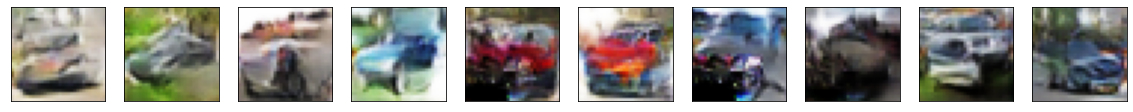

In [35]:
plot_images(generated_images)